# **Convolutional Neural Network CNN - CIFAR10 Dataset**

- ### **Import Libraries**

In [1]:
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [2]:
from sklearn.metrics import classification_report

- ### **Data Preparation**
This section covers loading the CIFAR-10 dataset, scaling the images for our model, and preparing our labels for training. We aim for our model to understand and predict these labels accurately.


In [3]:
from keras.utils import to_categorical
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
import matplotlib.pyplot as plt

In [5]:
# Check the shape of input features
x_train.shape

(50000, 32, 32, 3)

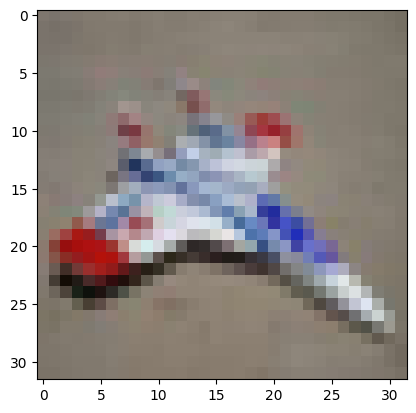

In [6]:
# Display Image

single_image  = x_train[30]

plt.imshow(single_image)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(50000, 1)

- ### **Why Use `to_categorical`?**
The `to_categorical` method transforms integer labels into a one-hot encoded format, crucial for multi-class classification in neural networks. This encoding matches the softmax output of the network's final layer, simplifying loss calculations and optimizing model training. It ensures each label is represented as a vector, indicating the class presence with a 1 in the corresponding position, making it compatible with the expected format for neural network outputs.

In [11]:
y_example = to_categorical(y_train)

y_example


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_example.shape

(50000, 10)

In [13]:
y_cat_train = to_categorical(y_train, 10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, 10)
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
# This gives the max pixel value present in this picture

single_image.max()

241

In [16]:
# This gives the min pixel value present in this picture

single_image.min()

5

- ### **Scaling the input features**

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
scaled_image = x_train[30]

In [19]:
scaled_image.max()

0.9450980392156862

In [20]:
scaled_image.min()

0.0196078431372549

- ### **CNN Model Building**

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()

# Convolutional layers with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))

# Flattening the output for the dense layers
model.add(Flatten())
# Dense layers with ReLU activation
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

# Output layer with Softmax activation
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 512)               0

- ### **Model Architecture Summary**

Our CNN model is designed to classify 32x32 pixel images from the CIFAR-10 dataset into one of 10 categories (like cars, birds, etc.). Here's the structure:

- **Convolutional Layers**: Extract patterns from images using filters. We have layers with 32, 64, and again 32 filters, each 3x3 in size. More filters help in detecting complex features.

- **MaxPooling Layers**: Reduce the image dimensionality to make the processing faster and more efficient without losing key features.

- **Flatten Layer**: Transforms the 2D feature maps into a 1D feature vector, preparing the data for the fully connected layers that follow.

- **Dense Layers**: These are the neural network's decision-makers. We start broad with 64 neurons, narrow down to 32, and finally to 10 neurons, each representing a class of the CIFAR-10 dataset.

- **Output Layer with Softmax**: Gives us a probability for each of the 10 classes, indicating how likely the image belongs to each class.

The model has a total of 73,098 parameters, all of which are trainable, meaning they're updated during the learning process to improve classification accuracy.


In [25]:
model.fit(x_train, y_cat_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6366 - accuracy: 0.4027
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2435 - accuracy: 0.5577
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0777 - accuracy: 0.6201
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9685 - accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8926 - accuracy: 0.6882
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8340 - accuracy: 0.7088
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7827 - accuracy: 0.7280
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7434 - accuracy: 0.7399
Epoch 9/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7111 - accuracy: 0.7556
Epoch 10/10
1563/1563 [==============================] - 39s 25m

- ### **Training Performance**

The model was trained for 10 epochs, showing gradual improvement in accuracy with each epoch:

- **First Epoch**: The model had a low accuracy of about 40%, indicating the starting point of learning.
- **Progress Over Epochs**: With each epoch, the model's accuracy increased as it learned from the training data, showing that it was becoming better at classifying the images.
- **Tenth Epoch**: By the last epoch, the model achieved an accuracy of around 76%, which means it correctly classified 76% of the training images.

Loss, a measure of error, decreased from approximately 1.63 to 0.68, indicating the model's predictions were getting closer to the actual labels.

While accuracy improved over time, further optimization may be needed to increase accuracy and reduce loss further, suggesting the model hasn't yet reached its peak performance.


In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_cat_test)
print("Test accuracy: ", test_accuracy)

# For more detailed metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes with model
import numpy as np

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Actual classes
true_classes = np.argmax(y_cat_test, axis=1)

# Generate and print classification report and confusion matrix
print(classification_report(true_classes, predicted_classes))
print(confusion_matrix(true_classes, predicted_classes))


313/313 [==============================] - 5s 16ms/step - loss: 0.9603 - accuracy: 0.6932
Test accuracy:  0.6931999921798706
313/313 [==============================] - 5s 17ms/step
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.86      0.81      0.84      1000
           2       0.47      0.71      0.56      1000
           3       0.54      0.54      0.54      1000
           4       0.69      0.64      0.66      1000
           5       0.69      0.49      0.57      1000
           6       0.77      0.75      0.76      1000
           7       0.81      0.71      0.75      1000
           8       0.69      0.89      0.78      1000
           9       0.86      0.71      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

[[698  15  86  12  11   4   7   2 133  32]
 [ 21 810  18   8

- ### **Model Evaluation on Test Data**

The model's performance was evaluated on the test set, which is a separate dataset not seen by the model during training. The purpose is to assess how well the model generalizes to new data.

- **Test Accuracy**: The model achieved a test accuracy of approximately 69.32%. This means that it correctly predicted the class of an image about 69% of the time on the test dataset.

- **Precision and Recall**: The classification report provides precision (the ratio of correctly predicted positive observations to the total predicted positives) and recall (the ratio of correctly predicted positive observations to all actual positives) for each class:
  - Classes with higher precision and recall are better predicted by the model.
  - Classes with lower scores may need more data or model adjustments to improve predictions.

- **F1-Score**: This is the harmonic mean of precision and recall and gives a combined idea about the false positives and false negatives. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.

- **Confusion Matrix**: It shows the actual versus predicted classifications. For instance, the number of times the model predicted each class compared to the actual class labels. This can help identify which classes are being confused with others.

The provided metrics are key to understanding the model's strengths and weaknesses in classifying the CIFAR-10 dataset. To further improve the model, you may consider refining the model architecture, training for more epochs, or using techniques like data augmentation and hyperparameter tuning.
